# **Diabetes Prediction System**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

**Loading the Data**

In [2]:
data =  pd.read_csv("diabetes.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

***Statistical Information about the Data***

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


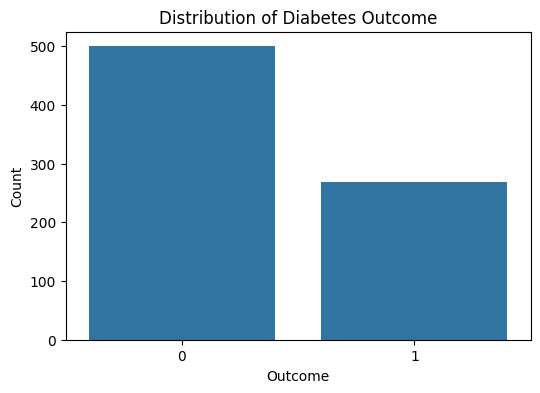

In [6]:
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
ax = sns.countplot(x="Outcome", data=data)
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Distribution of Diabetes Outcome")
plt.show()

In [7]:
outcome_counts = data['Outcome'].value_counts()

# Display the counts
print("Non-Diabetic (Outcome 0):", outcome_counts[0])
print("Diabetic (Outcome 1):", outcome_counts[1])


Non-Diabetic (Outcome 0): 500
Diabetic (Outcome 1): 268


**Replacing Zero Values with NA**

In [8]:
df  =  data.copy()

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
column = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for c in column:
    print(f"{c}: {(data[c] == 0).sum()}")

Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0


In [11]:

df_outcome_one = df[df['Outcome'] == 1]
zero_counts = (df_outcome_one == 0).sum()
print(zero_counts)


df_outcome_one = df[df['Outcome'] == 0]
zero_counts = (df_outcome_one == 0).sum()
print(zero_counts)


Pregnancies                  38
Glucose                       2
BloodPressure                16
SkinThickness                88
Insulin                     138
BMI                           2
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Pregnancies                  73
Glucose                       3
BloodPressure                19
SkinThickness               139
Insulin                     236
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [12]:
# Remove rows where both outcome and insulin are zero
# df = df[~((df['Outcome'] == 0) & (df['Insulin'] == 0))]


In [13]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


*A Female with Zero Pregnancies can have diabetes*

In [14]:
df[[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']] = df[[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']].replace(0, np.nan)

In [15]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


**Checking Possible Outliers**

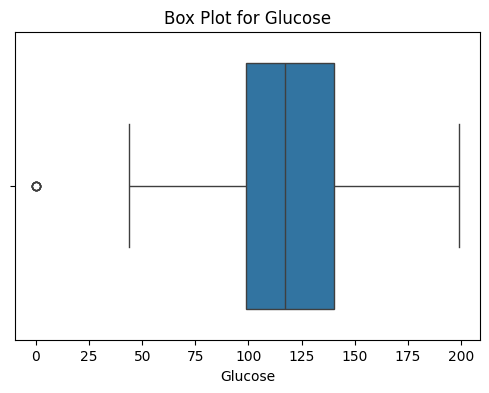

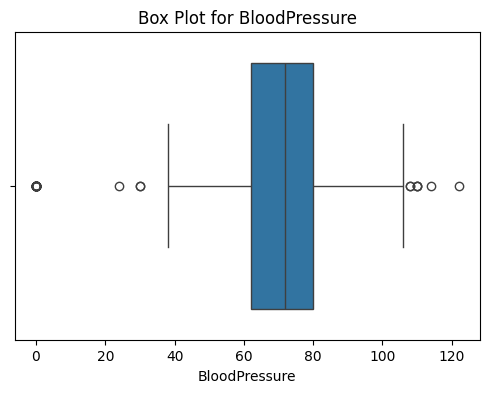

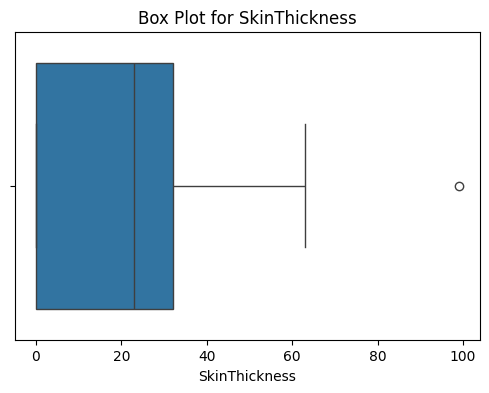

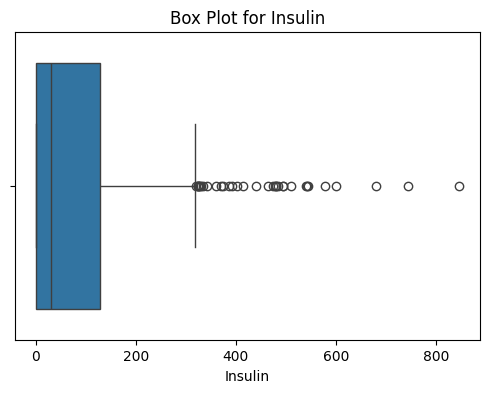

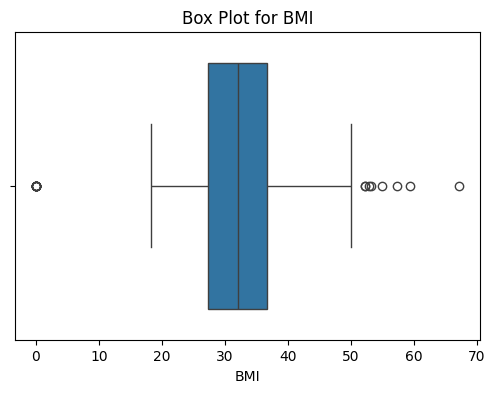

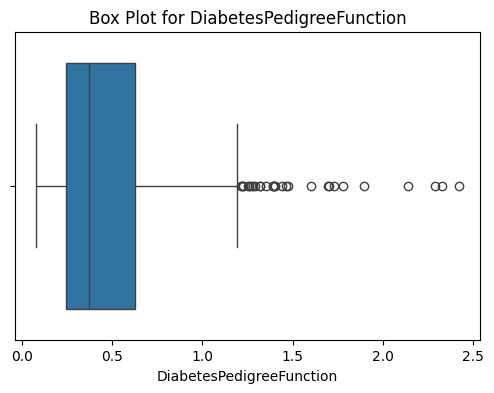

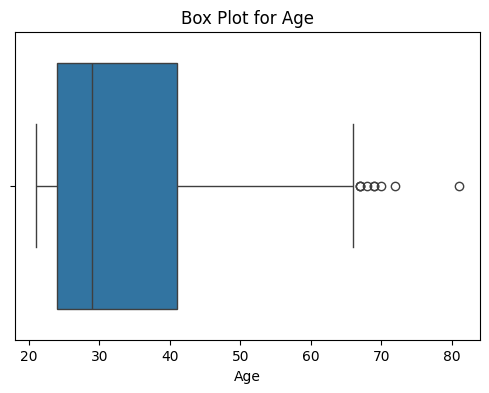

In [16]:
# Assuming 'df' is your DataFrame
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create individual box plots for each feature
for feature in features:
    plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
    sns.boxplot(x=feature, data=data)
    plt.title(f"Box Plot for {feature}")
    plt.show()

**Visualizing Distribution of Features** *(for Replacement of NA)* 

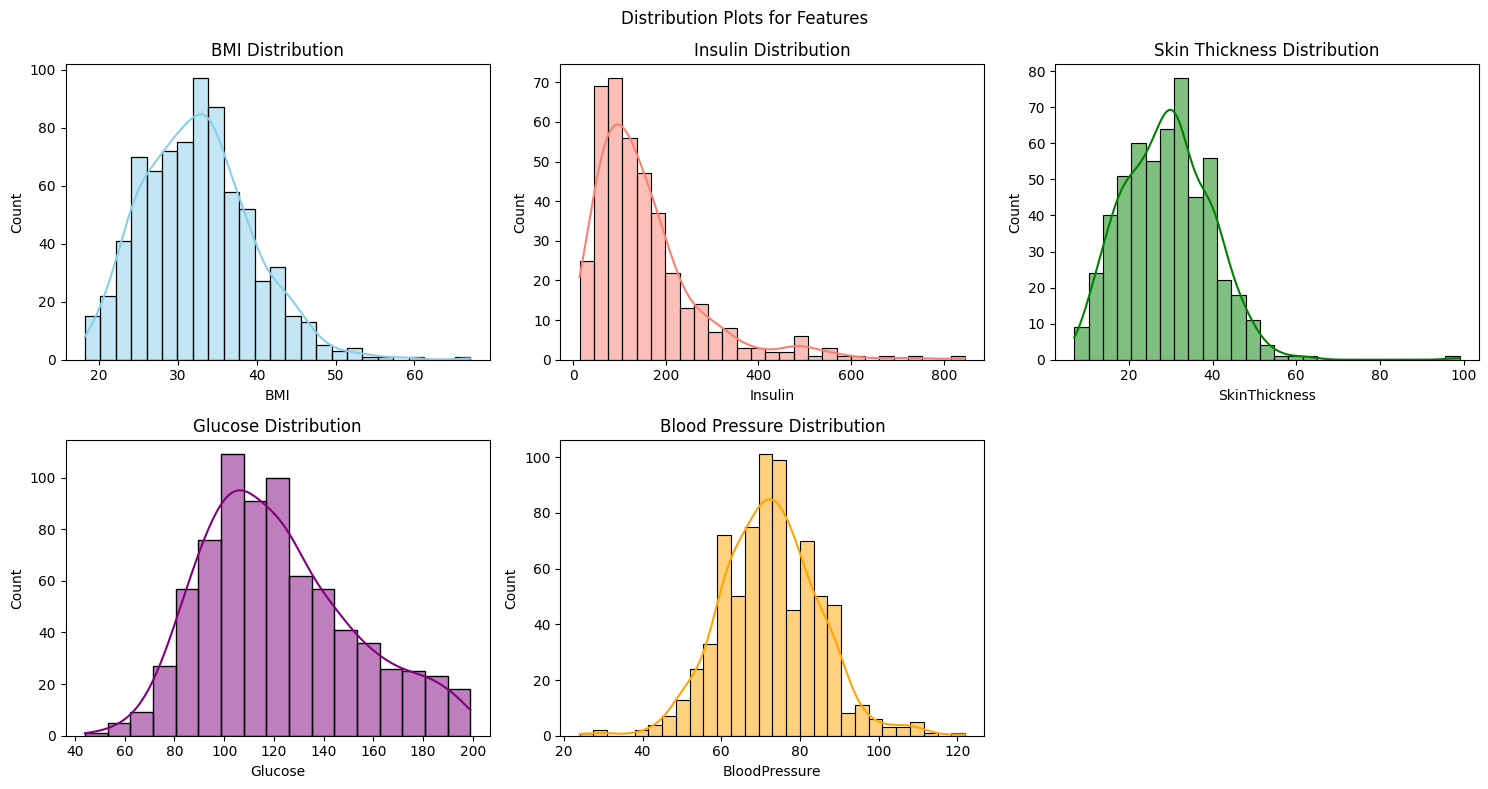

In [17]:

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle("Distribution Plots for Features")

# Plot histograms and density plots
sns.histplot(df["BMI"], kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("BMI Distribution")

sns.histplot(df["Insulin"], kde=True, ax=axes[0, 1], color="salmon")
axes[0, 1].set_title("Insulin Distribution")

sns.histplot(df["SkinThickness"], kde=True, ax=axes[0, 2], color="green")
axes[0, 2].set_title("Skin Thickness Distribution")

sns.histplot(df["Glucose"], kde=True, ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Glucose Distribution")

sns.histplot(df["BloodPressure"], kde=True, ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Blood Pressure Distribution")

# Hide empty subplot
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()


**Replacing the NA values**

In [18]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [19]:
# Replacing BMI
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [20]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

In [21]:
# Replacing BMI
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [22]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

In [23]:
# Replacing BMI
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [24]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27.0
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32.0

In [25]:
# Replacing BMI
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [26]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107.0
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140.0

In [27]:
# Replacing BMI
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [28]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70.0
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [29]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1


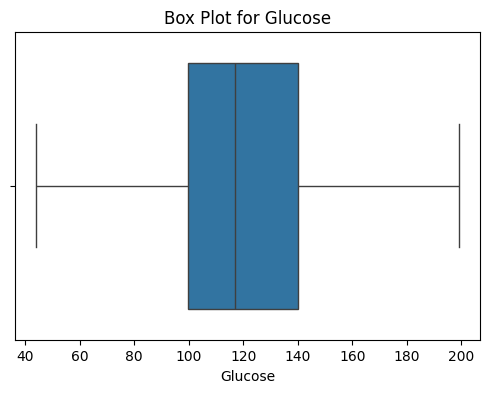

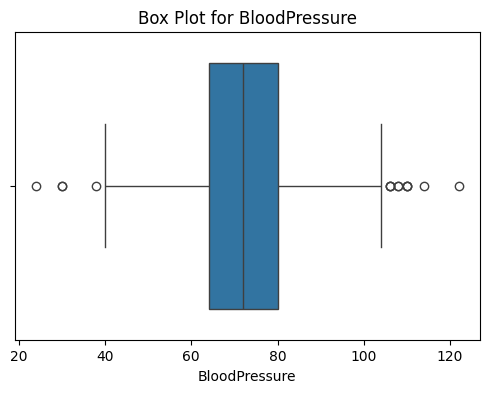

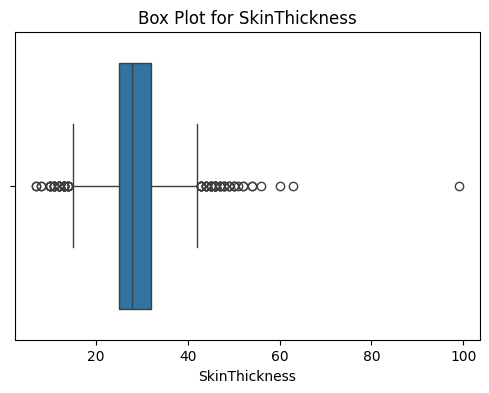

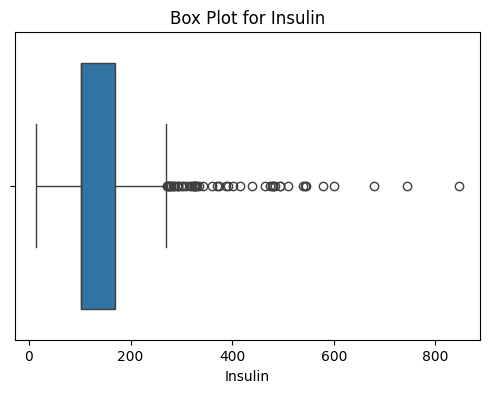

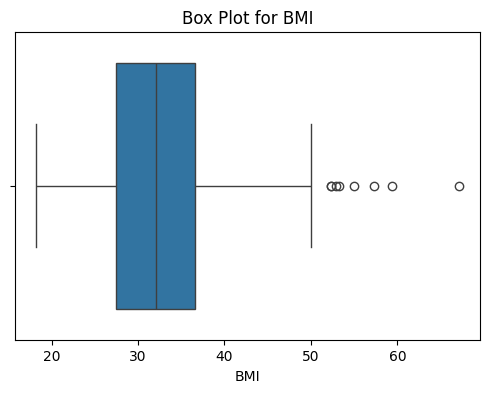

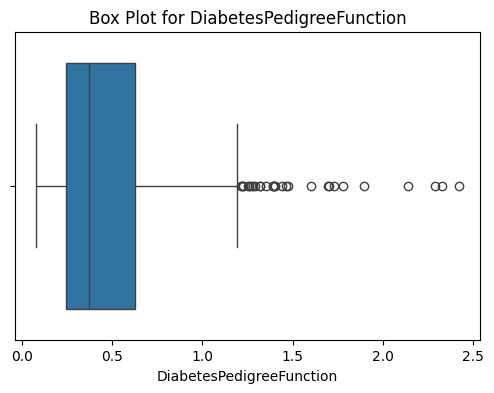

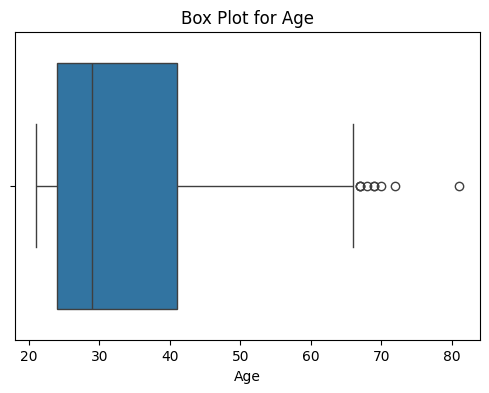

In [30]:
#Handling outliers
# Assuming 'df' is your DataFrame
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create individual box plots for each feature
for feature in features:
    plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
    sns.boxplot(x=feature, data=df)
    plt.title(f"Box Plot for {feature}")
    plt.show()

Handling Outliers

In [31]:
features = ["BloodPressure","SkinThickness", "Insulin", "BMI"]
for feature in features:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3-q1
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr

    # print("-- Upper Outliers --")
    if df[(df[feature]>upper)].any(axis=None):
        print(feature,": yes",(df[feature]>upper).sum() )
    else:
        print(feature,": no")

BloodPressure : yes 10
SkinThickness : yes 48
Insulin : yes 51
BMI : yes 8


In [32]:
features = ["SkinThickness","Insulin","BMI","BloodPressure"]
# Calculate Q1, Q3, and IQR
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers
    df.loc[df[feature] > upper_bound, feature] = upper_bound

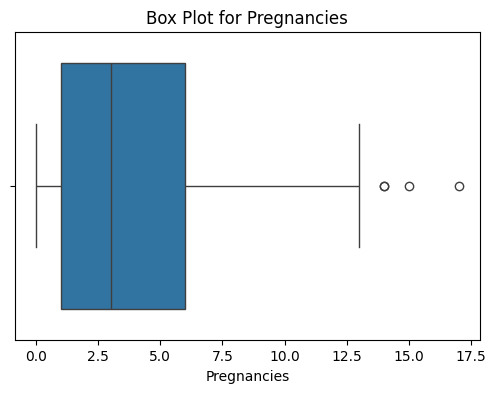

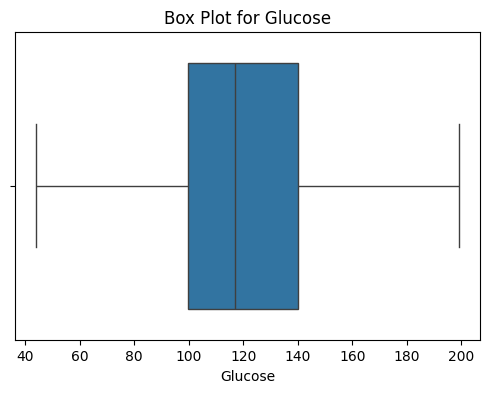

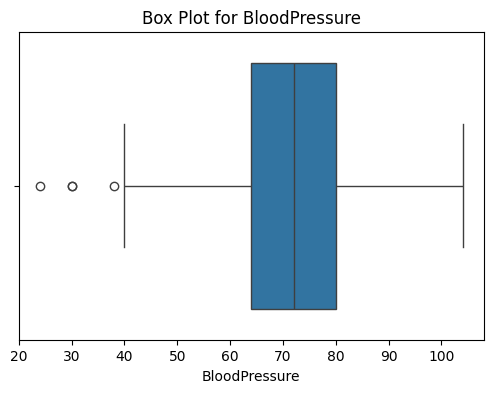

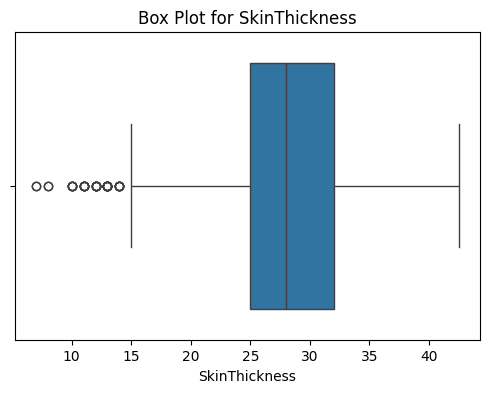

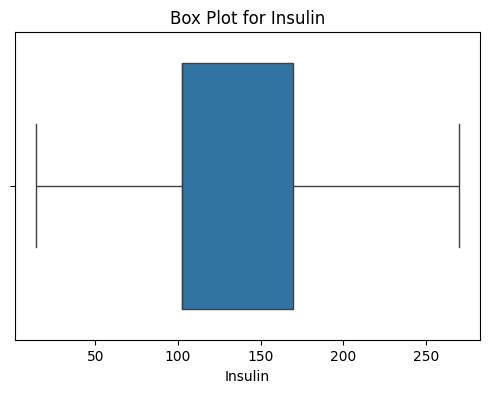

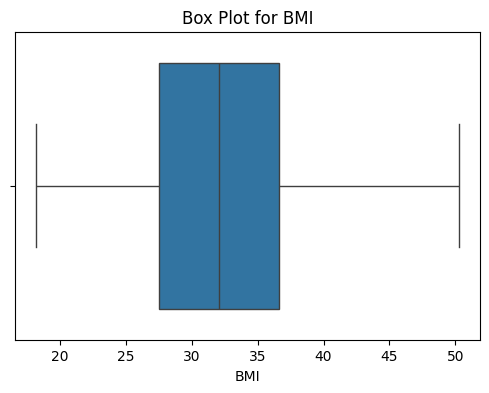

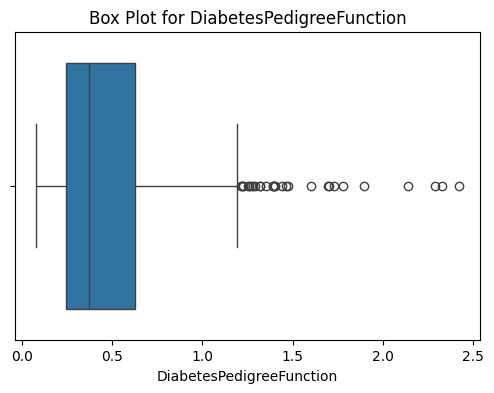

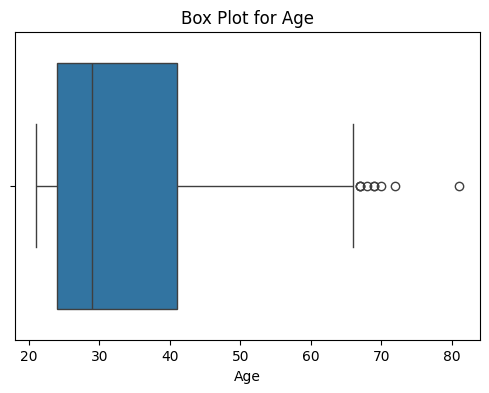

In [33]:

features = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create individual box plots for each feature
for feature in features:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=feature, data=df)
    plt.title(f"Box Plot for {feature}")
    plt.show()

In [34]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,42.5,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1


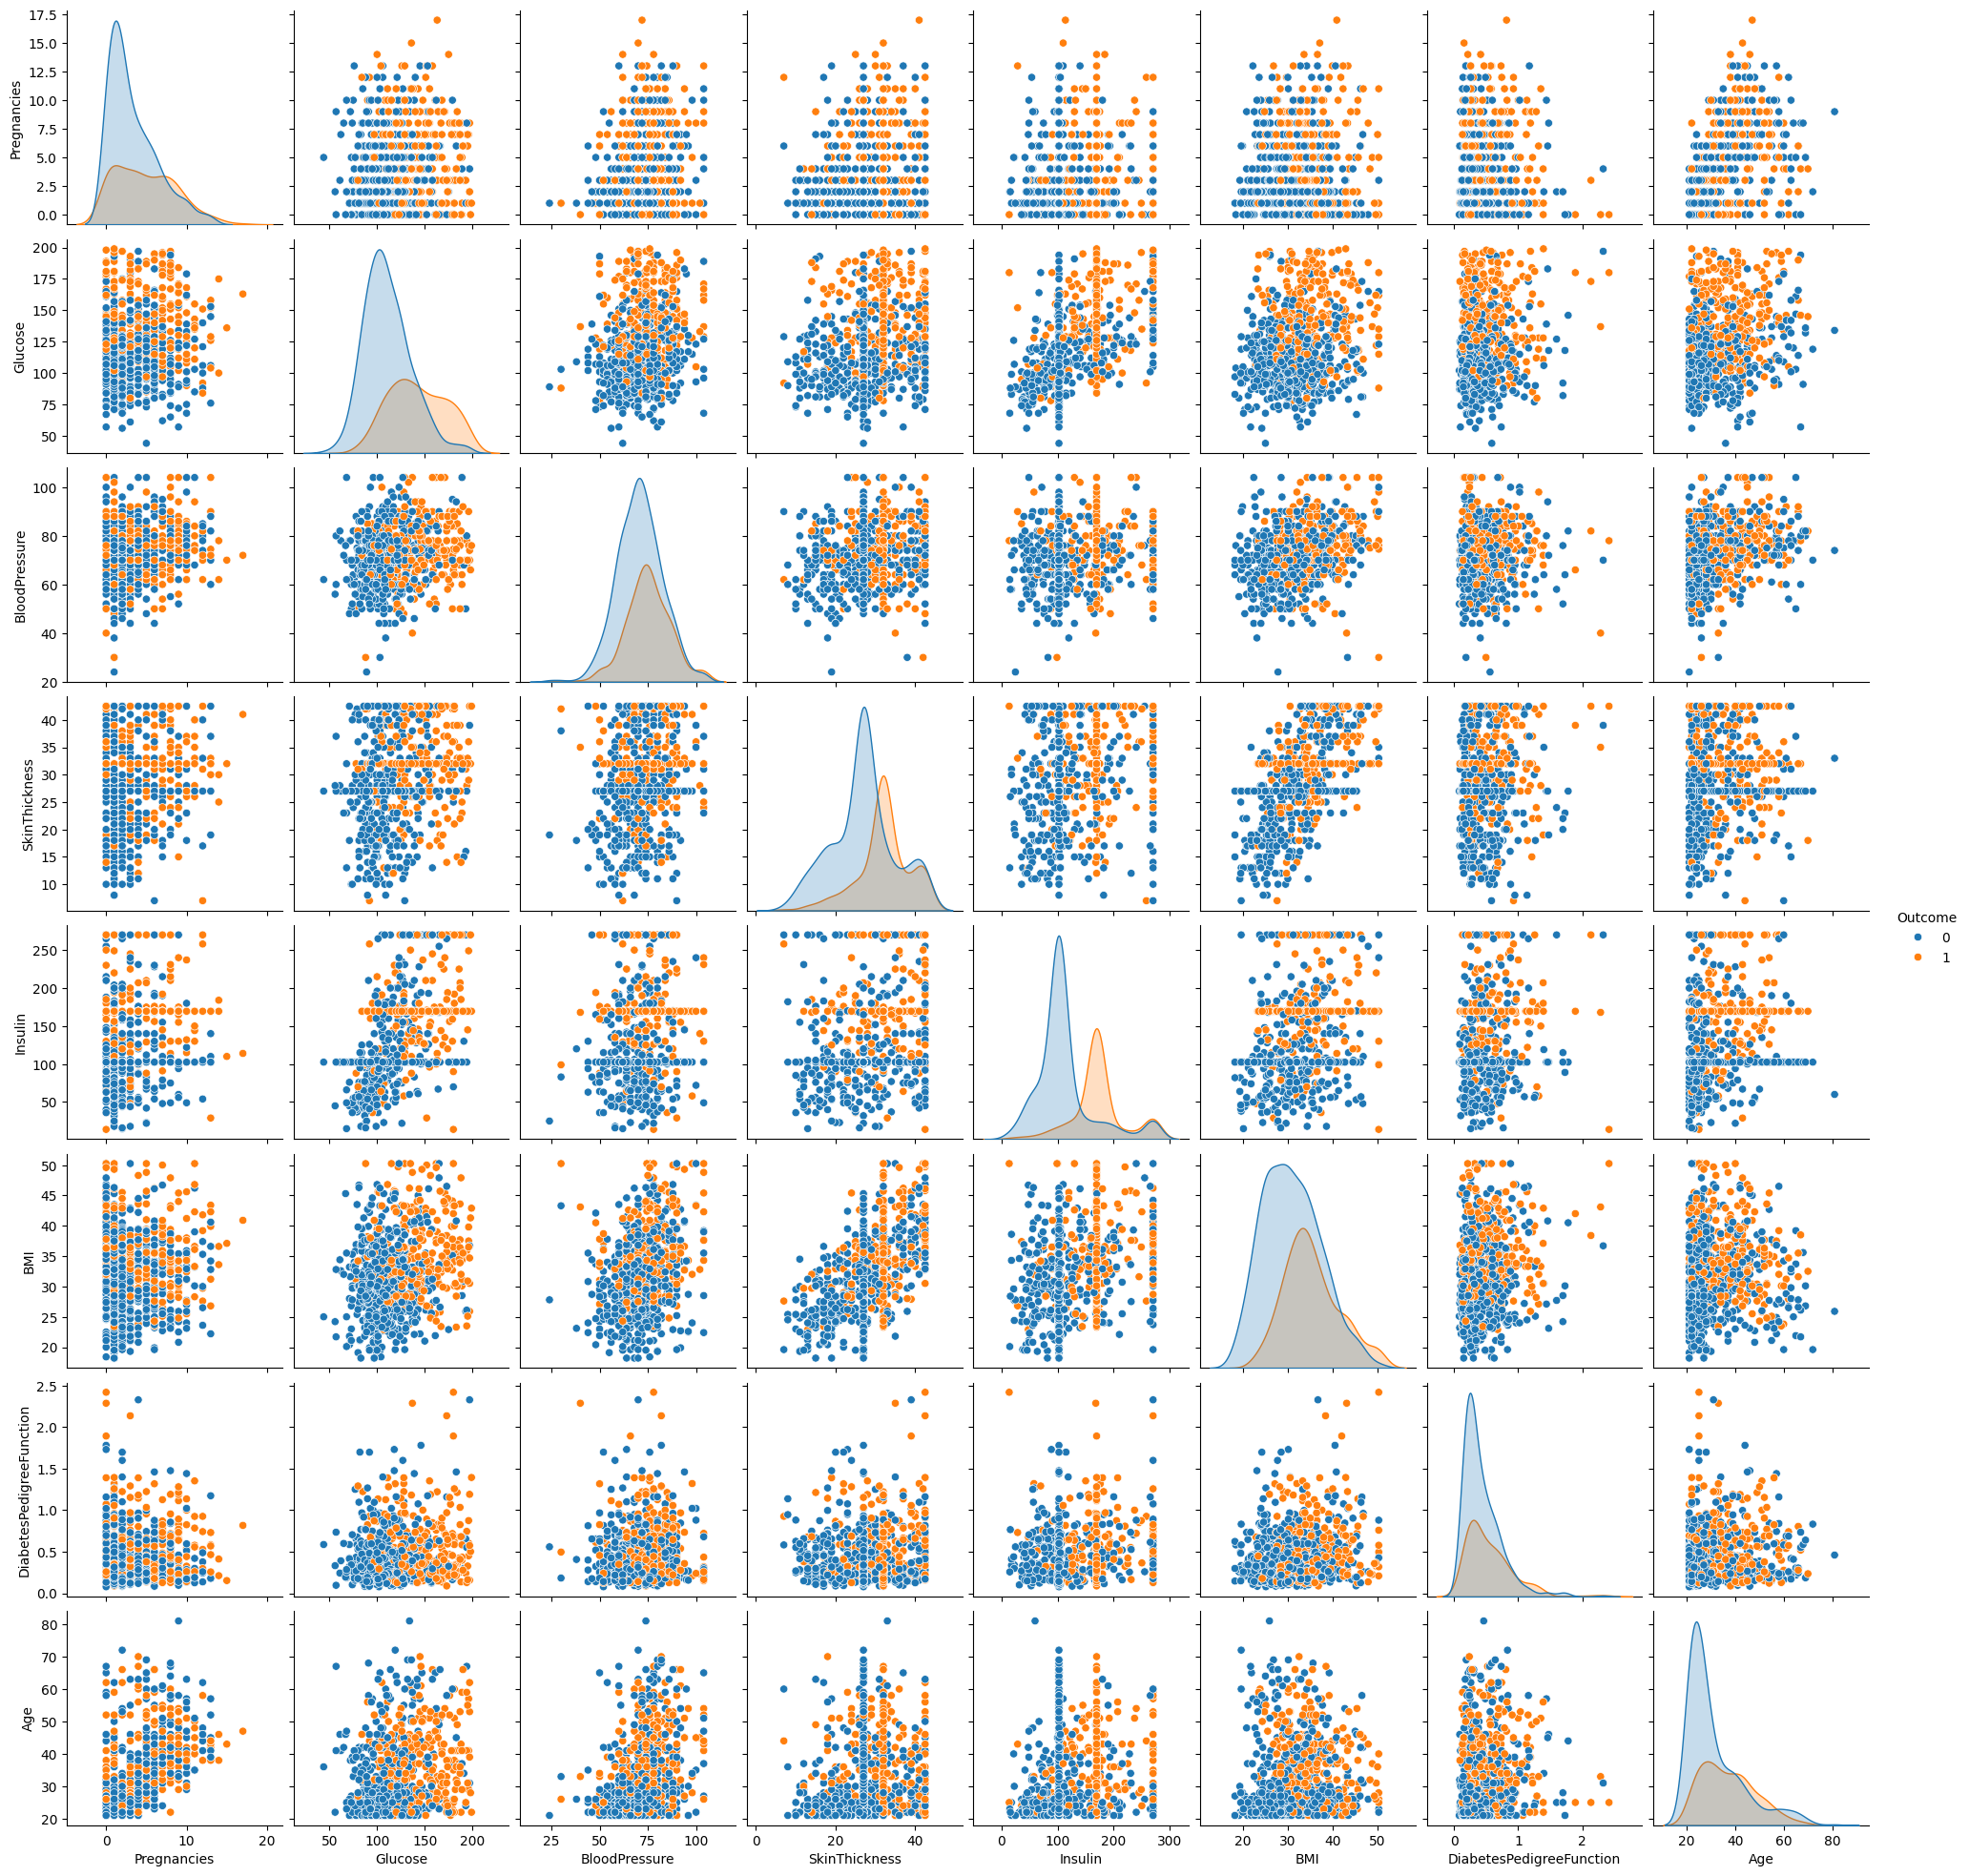

In [35]:
sns.pairplot(df,hue="Outcome")

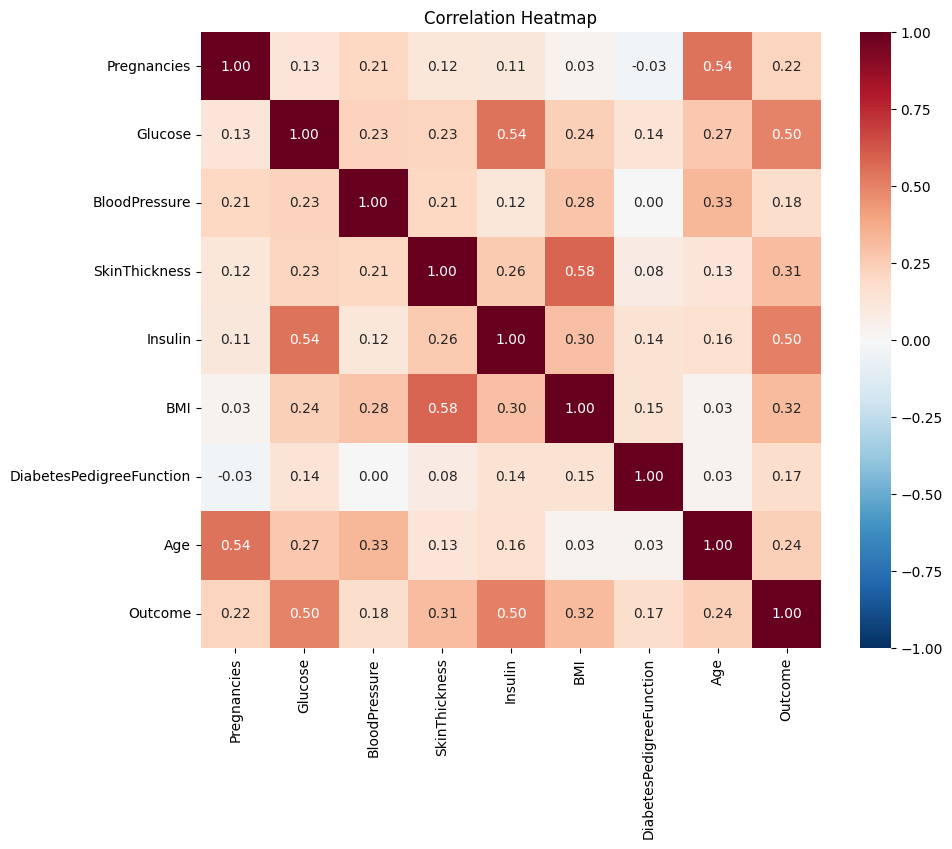

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), vmin=-1, center=0, cmap="RdBu_r", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

*Making New Feature for BMI*

In [37]:

catBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity1", "Obesity2","Obesity3"],dtype="category")

In [38]:
df["catBMI"] = catBMI
df.loc[df["BMI"]<18.5, "catBMI"] = catBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"] <= 24.9, "catBMI"] = catBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"] <= 29.9, "catBMI"] = catBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"] <= 34.9, "catBMI"] = catBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"] <= 39.9, "catBMI"] = catBMI[4]
df.loc[df["BMI"]>39.9, "catBMI"] = catBMI[5]


*Making New Category Feature for Insulin*

In [39]:

def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [40]:
df = df.assign(catInsulin=df.apply(set_insuline, axis=1))

In [41]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,catBMI,catInsulin
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity2,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity2,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity2,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity2,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity3,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,42.5,180.0,32.9,0.171,63,0,Obesity2,Abnormal
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0,Obesity2,Normal
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,Obesity2,Normal
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1,Obesity2,Abnormal


*Making New Category Feature for Glucose*


In [42]:
bins = [0, 70, 100, 125, float('inf')]
labels = ['Low', 'Normal', 'Pre-Diabetes', 'Diabetes']
df['catGlucose'] = pd.cut(df['Glucose'], bins=bins, labels=labels)



*Making New Category Feature for BloodPressure*

In [43]:

bins = [0, 80, 89, 99, 109, float('inf')]
labels = ['Normal', 'Prehypertension', 'HT1', 'HT2', 'Hypertensive Crisis']
df
df['catBP'] = pd.cut(df['BloodPressure'], bins=bins, labels=labels)

In [44]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,catBMI,catInsulin,catGlucose,catBP
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity2,Abnormal,Diabetes,Normal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity2,Normal,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity2,Abnormal,Diabetes,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity2,Normal,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity3,Abnormal,Diabetes,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,42.5,180.0,32.9,0.171,63,0,Obesity2,Abnormal,Pre-Diabetes,Normal
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0,Obesity2,Normal,Pre-Diabetes,Normal
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,Obesity2,Normal,Pre-Diabetes,Normal
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1,Obesity2,Abnormal,Diabetes,Normal


In [45]:
# One Hot Encoding
df = pd.get_dummies(df, columns = ["catBMI", "catInsulin", "catGlucose", "catBP"], drop_first=True)


In [46]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,catBMI_Obesity1,...,catBMI_Overweight,catBMI_Underweight,catInsulin_Normal,catGlucose_Normal,catGlucose_Pre-Diabetes,catGlucose_Diabetes,catBP_Prehypertension,catBP_HT1,catBP_HT2,catBP_Hypertensive Crisis
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,False,...,False,False,False,False,False,True,False,False,False,False
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,...,False,False,True,True,False,False,False,False,False,False
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,False,...,False,False,False,False,False,True,False,False,False,False
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,...,False,False,True,True,False,False,False,False,False,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,...,False,False,False,False,False,True,False,False,False,False


In [47]:
categorical_df = df[['catBMI_Obesity1',
       'catBMI_Obesity2', 'catBMI_Obesity3', 'catBMI_Overweight',
       'catBMI_Underweight', 'catInsulin_Normal', 'catGlucose_Normal',
       'catGlucose_Pre-Diabetes', 'catGlucose_Diabetes',
       'catBP_Prehypertension', 'catBP_HT1', 'catBP_HT2',
       'catBP_Hypertensive Crisis']]

In [48]:
y=df['Outcome']
x=df.drop(['Outcome','catBMI_Obesity1',
       'catBMI_Obesity2', 'catBMI_Obesity3', 'catBMI_Overweight',
       'catBMI_Underweight', 'catInsulin_Normal', 'catGlucose_Normal',
       'catGlucose_Pre-Diabetes', 'catGlucose_Diabetes',
       'catBP_Prehypertension', 'catBP_HT1', 'catBP_HT2',
       'catBP_Hypertensive Crisis'], axis=1)

In [49]:
cols = x.columns
index = x.index

In [50]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [51]:
pd.set_option('display.max_columns', 100)

In [52]:
x = pd.concat([x, categorical_df], axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,catBMI_Obesity1,catBMI_Obesity2,catBMI_Obesity3,catBMI_Overweight,catBMI_Underweight,catInsulin_Normal,catGlucose_Normal,catGlucose_Pre-Diabetes,catGlucose_Diabetes,catBP_Prehypertension,catBP_HT1,catBP_HT2,catBP_Hypertensive Crisis
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,False,True,False,False,False,False,False,False,True,False,False,False,False
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,False,True,False,False,False,True,True,False,False,False,False,False,False
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,False,True,False,False,False,False,False,False,True,False,False,False,False
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,False,True,False,False,False,True,True,False,False,False,False,False,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,False,False,True,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,42.5,180.0,32.9,0.171,63,False,True,False,False,False,False,False,True,False,False,False,False,False
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,False,True,False,False,False,True,False,True,False,False,False,False,False
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,False,True,False,False,False,True,False,True,False,False,False,False,False
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,False,True,False,False,False,False,False,False,True,False,False,False,False


*Converting Boolean to Binary*

In [53]:
# List of columns to convert
columns_to_convert = ['catBMI_Obesity1', 'catBMI_Obesity2', 'catBMI_Obesity3', 
                      'catBMI_Overweight', 'catBMI_Underweight', 'catInsulin_Normal', 
                      'catGlucose_Normal', 'catGlucose_Pre-Diabetes', 'catGlucose_Diabetes', 
                      'catBP_Prehypertension', 'catBP_HT1', 'catBP_HT2', 'catBP_Hypertensive Crisis']

# Check each column
for col in columns_to_convert:
    if col in x.columns:
        try:
            x[col] = x[col].astype(int)
        except ValueError:
            print(f"Cannot convert {col} to integer due to non-numeric values.")
    else:
        print(f"{col} does not exist in the DataFrame.")


**Splitting the Training and Testing Dataset**

In [54]:
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=0)


In [55]:
y_train

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

In [56]:
print((y_train==0).sum())
print((y_train==1).sum())


393
221


In [57]:
scaler =StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **Machine Learning Algorithms**

***Logistic Regression***

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [59]:
accuracy_score(y_train, log_reg.predict(x_train))

0.8436482084690554

In [60]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(x_test))

In [61]:
log_reg_acc

0.8896103896103896

In [62]:
confusion_matrix(y_test, y_pred)

array([[97, 10],
       [ 7, 40]], dtype=int64)

In [63]:
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       107
           1       0.80      0.85      0.82        47

    accuracy                           0.89       154
   macro avg       0.87      0.88      0.87       154
weighted avg       0.89      0.89      0.89       154



***K Nearest Neighbours***

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_train, knn.predict(x_train)))
knn_acc = accuracy_score(y_test, knn.predict(x_test))
print(accuracy_score(y_test, knn.predict(x_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8713355048859935
0.8376623376623377
[[93 14]
 [11 36]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       107
           1       0.72      0.77      0.74        47

    accuracy                           0.84       154
   macro avg       0.81      0.82      0.81       154
weighted avg       0.84      0.84      0.84       154



***Support Vector Machine***

In [65]:

from sklearn.svm import  SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [66]:
# best_parameter
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [67]:
grid_search.best_score_

0.8403838464614155

In [68]:
# svc = SVC(C=10, gamma = 0.01, probability=True)
svc =grid_search.best_estimator_
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(accuracy_score(y_train, svc.predict(x_train)))
svc_acc = accuracy_score(y_test, svc.predict(x_test))
print(accuracy_score(y_test, svc.predict(x_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8697068403908795
0.9155844155844156
[[100   7]
 [  6  41]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       107
           1       0.85      0.87      0.86        47

    accuracy                           0.92       154
   macro avg       0.90      0.90      0.90       154
weighted avg       0.92      0.92      0.92       154



***Decision Tree Classifier***

In [69]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [70]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
print(accuracy_score(y_train, DT.predict(x_train)))

print(accuracy_score(y_test, DT.predict(x_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.8831168831168831
[[95 12]
 [ 6 41]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       107
           1       0.77      0.87      0.82        47

    accuracy                           0.88       154
   macro avg       0.86      0.88      0.87       154
weighted avg       0.89      0.88      0.88       154



In [71]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7], 
    'min_samples_split':[1,2,3,5,7], 
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(x_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


c:\Users\mayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
44000 fits failed out of a total of 60000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15059 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\mayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklear

GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [72]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [73]:
grid_search_dt.best_score_

0.856025641025641

In [74]:
grid_search_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       min_samples_leaf=2)

In [75]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(x_test)
print(accuracy_score(y_train, DT.predict(x_train)))
dt_acc = accuracy_score(y_test, DT.predict(x_test))
print(accuracy_score(y_test, DT.predict(x_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9332247557003257
0.8766233766233766
[[93 14]
 [ 5 42]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       107
           1       0.75      0.89      0.82        47

    accuracy                           0.88       154
   macro avg       0.85      0.88      0.86       154
weighted avg       0.89      0.88      0.88       154



***Random Forest Classifier***

In [76]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [77]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rand_clf = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator=rand_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose = 1)
grid_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

In [78]:
grid_search_rf.best_params_

{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 500}

In [79]:
grid_search_rf.best_score_

0.8843395974943358

In [80]:
rand_clf = grid_search_rf.best_estimator_
rand_clf.fit(x_train, y_train)
y_pred = rand_clf.predict(x_test)
print(accuracy_score(y_train, rand_clf.predict(x_train)))
rand_acc = accuracy_score(y_test, rand_clf.predict(x_test))
print(accuracy_score(y_test, rand_clf.predict(x_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.990228013029316
0.8896103896103896
[[95 12]
 [ 5 42]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       107
           1       0.78      0.89      0.83        47

    accuracy                           0.89       154
   macro avg       0.86      0.89      0.87       154
weighted avg       0.90      0.89      0.89       154



In [81]:
# rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
# rand_clf.fit(x_train, y_train)
# y_pred = rand_clf.predict(x_test)

In [82]:
# y_pred = rand_clf.predict(x_test)
# print(accuracy_score(y_train, rand_clf.predict(x_train)))
# rand_acc = accuracy_score(y_test, rand_clf.predict(x_test))
# print(accuracy_score(y_test, rand_clf.predict(x_test)))
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

***Gradient Boosting Classifier***

In [83]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(x_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


c:\Users\mayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
57 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\mayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [84]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 200}

In [85]:
grid_search_gbc.best_score_

0.8777895293495506

In [86]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=150)

In [87]:
grid_search_gbc.best_estimator_

GradientBoostingClassifier(loss='exponential', n_estimators=200)

In [88]:
gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(x_test)
print(accuracy_score(y_train, gbc.predict(x_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(x_test))
print(accuracy_score(y_test, gbc.predict(x_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.922077922077922
[[99  8]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       107
           1       0.84      0.91      0.88        47

    accuracy                           0.92       154
   macro avg       0.90      0.92      0.91       154
weighted avg       0.93      0.92      0.92       154



***XGB Classifier***

In [89]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [90]:
y_pred = xgb.predict(x_test)
print(accuracy_score(y_train, xgb.predict(x_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(x_test))
print(accuracy_score(y_test, xgb.predict(x_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9788273615635179
0.9155844155844156
[[101   6]
 [  7  40]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       107
           1       0.87      0.85      0.86        47

    accuracy                           0.92       154
   macro avg       0.90      0.90      0.90       154
weighted avg       0.92      0.92      0.92       154



**Model Comparison**

In [91]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dt_acc,4), 100*round(rand_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Gradient Boosting Classifier,92.21
2,SVM,91.56
6,XgBoost,91.56
0,Logistic Regression,88.96
4,Random Forest Classifier,88.96
3,Decision Tree Classifier,87.66
1,KNN,83.77


In [92]:
import pickle

with open("gbc.pkl","wb") as file:
    pickle.dump(gbc, file)

In [95]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [94]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,catBMI_Obesity1,catBMI_Obesity2,catBMI_Obesity3,catBMI_Overweight,catBMI_Underweight,catInsulin_Normal,catGlucose_Normal,catGlucose_Pre-Diabetes,catGlucose_Diabetes,catBP_Prehypertension,catBP_HT1,catBP_HT2,catBP_Hypertensive Crisis
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,0,0,0,1,1,0,0,0,0,0,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,0,1,0,0,0,0,0,0,1,0,0,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,0,0,0,1,1,0,0,0,0,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,42.5,180.0,32.9,0.171,63,0,1,0,0,0,0,0,1,0,0,0,0,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0,1,0,0,0,1,0,1,0,0,0,0,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,1,0,0,0,1,0,1,0,0,0,0,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,0,1,0,0,0,0,0,0,1,0,0,0,0


# **Predicting Values using the Trained Model**

In [9]:
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageTk
from sklearn.preprocessing import StandardScaler
import pickle

def predict_diabetes():
    # Get values from the input fields
    pregnancies = int(pregnancies_entry.get())
    glucose = float(glucose_entry.get())
    blood_pressure = float(blood_pressure_entry.get())
    skin_thickness = float(skin_thickness_entry.get())
    insulin = float(insulin_entry.get())
    bmi = float(bmi_entry.get())
    dpf = float(dpf_entry.get())
    age = int(age_entry.get())

    # Determine glucose category
    if 0 <= glucose < 70:
        glucose_low = 1
        glucose_normal = 0
        glucose_prediabetes = 0
        glucose_diabetes = 0
    elif 70 <= glucose < 100:
        glucose_low = 0
        glucose_normal = 1
        glucose_prediabetes = 0
        glucose_diabetes = 0
    elif 100 <= glucose < 125:
        glucose_low = 0
        glucose_normal = 0
        glucose_prediabetes = 1
        glucose_diabetes = 0
    else:  # glucose >= 125
        glucose_low = 0
        glucose_normal = 0
        glucose_prediabetes = 0
        glucose_diabetes = 1

    # Determine blood pressure category
    if 0 <= blood_pressure < 80:
        Normal = 1
        Prehypertension = 0
        HT1 = 0
        HT2 = 0
        Hypertensive_Crisis = 0
    elif 80 < blood_pressure <= 89:
        Normal = 0
        Prehypertension = 1
        HT1 = 0
        HT2 = 0
        Hypertensive_Crisis = 0
    elif 89 < blood_pressure <= 99:
        Normal = 0
        Prehypertension = 0
        HT1 = 1
        HT2 = 0
        Hypertensive_Crisis = 0
    elif 99 < blood_pressure < 110:
        Normal = 0
        Prehypertension = 0
        HT1 = 0
        HT2 = 1
        Hypertensive_Crisis = 0
    elif blood_pressure > 110:  # blood_pressure >= 109
        Normal = 0
        Prehypertension = 0
        HT1 = 0
        HT2 = 0
        Hypertensive_Crisis = 1

    # Determine insulin category
    if insulin >= 16 and insulin <= 166:
        insulin_normal = 1
        insulin_abnormal = 0
    else:
        insulin_abnormal = 1
        insulin_normal = 0

    # Determine BMI category
    categories = {
        'bmi_Underweight': (None, 18.5),
        'bmi_Normal': (18.6, 24.9),
        'bmi_Overweight': (25, 29.9),
        'bmi_Obesity1': (30, 34.9),
        'bmi_Obesity2': (35, 39.9),
        'bmi_Obesity3': (40, None)
    }

    for category, (lower, upper) in categories.items():
        if (lower is None or lower <= bmi) and (upper is None or bmi <= upper):
            globals()[category] = 1
        else:
            globals()[category] = 0

    # Create a 2D array with the input values
    input_values = [[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age, globals()["bmi_Obesity1"], globals()["bmi_Obesity2"], globals()["bmi_Obesity3"], globals()["bmi_Overweight"], globals()["bmi_Underweight"], insulin_normal, glucose_normal, glucose_prediabetes, glucose_diabetes, Prehypertension, HT1, HT2, Hypertensive_Crisis]]

    
    transformer = StandardScaler().fit(input_values)
    scaled_data=transformer.transform(input_values)

    with open("gbc.pkl","rb") as file:
        model = pickle.load(file)

    prediction = model.predict(input_values)

    # Display the prediction
    if prediction[0] == 1:
        messagebox.showinfo("Prediction", "The model predicts that the person has diabetes.")
    else:
        messagebox.showinfo("Prediction", "The model predicts that the person does not have diabetes.")

# Create a new Tkinter window
window = tk.Tk()

# Set the window title
window.title("Diabetes Prediction System")

# Load and set the background image
background_image = Image.open("img.jpeg")  
background_image = background_image.resize((800, 600))  
global background_photo
background_photo = ImageTk.PhotoImage(background_image)

# Set the window size to match the image size
window.geometry(f"{background_image.width}x{background_image.height}")

background_photo = ImageTk.PhotoImage(background_image)
background_label = tk.Label(window, image=background_photo)
background_label.place(x=0, y=0, relwidth=1, relheight=1)

# Create a frame for the input fields and buttons
frame = tk.Frame(window)
frame.pack(side=tk.LEFT, padx=20, pady=20)

# Create input fields for each feature
def create_entry_and_label(text):
    label = tk.Label(frame, text=text, font=("Helvetica", 14))
    label.pack(side=tk.TOP, anchor="w")
    entry = tk.Entry(frame, font=("Helvetica", 14))
    entry.pack(side=tk.TOP, anchor="w")
    return entry

pregnancies_entry = create_entry_and_label("Pregnancies")
glucose_entry = create_entry_and_label("Glucose")
blood_pressure_entry = create_entry_and_label("Blood Pressure")
skin_thickness_entry = create_entry_and_label("Skin Thickness")
insulin_entry = create_entry_and_label("Insulin")
bmi_entry = create_entry_and_label("BMI")
dpf_entry = create_entry_and_label("Diabetes Pedigree Function")
age_entry = create_entry_and_label("Age")

# Create a 'Predict' button
predict_button = tk.Button(frame, text="Predict", command=predict_diabetes, font=("Helvetica", 14))
predict_button.pack(side=tk.TOP, anchor="w", pady=10)

# Run the Tkinter event loop
window.mainloop()


In [503]:
pregnancies = int(input("Enter Pregnancies"))

glucose = float(input("Enter glucose"))

if 0 <= glucose < 70:
    glucose_low = 1
    glucose_normal = 0
    glucose_prediabetes = 0
    glucose_diabetes = 0
elif 70 <= glucose < 100:
    glucose_low = 0
    glucose_normal = 1
    glucose_prediabetes = 0
    glucose_diabetes = 0
elif 100 <= glucose < 125:
    glucose_low = 0
    glucose_normal = 0
    glucose_prediabetes = 1
    glucose_diabetes = 0
else:  # glucose >= 125
    glucose_low = 0
    glucose_normal = 0
    glucose_prediabetes = 0
    glucose_diabetes = 1

blood_pressure = float(input("Enter blood pressure"))

if 0 <= blood_pressure < 80:
    Normal = 1
    Prehypertension = 0
    HT1 = 0
    HT2 = 0
    Hypertensive_Crisis = 0
elif 80 < blood_pressure <= 89:
    Normal = 0
    Prehypertension = 1
    HT1 = 0
    HT2 = 0
    Hypertensive_Crisis = 0
elif 89 < blood_pressure <= 99:
    Normal = 0
    Prehypertension = 0
    HT1 = 1
    HT2 = 0
    Hypertensive_Crisis = 0
elif 99 < blood_pressure < 110:
    Normal = 0
    Prehypertension = 0
    HT1 = 0
    HT2 = 1
    Hypertensive_Crisis = 0
elif blood_pressure>110:  # blood_pressure >= 109
    Normal = 0
    Prehypertension = 0
    HT1 = 0
    HT2 = 0
    Hypertensive_Crisis = 1

skinthickness = float(input("Enter Skin Thickness"))

insulin  = float(input("Enter Insulin"))

if insulin >=16 and insulin<=166:
    insulin_normal = 1
    insulin_abnormal = 0
else:
    insulin_abnormal = 1
    insulin_normal = 0

# print(insulin_normal)
# print(insulin_abnormal)
bmi = float(input("Enter bmi"))
categories = {
    'bmi_Underweight': (None, 18.5),
    'bmi_Normal': (18.6, 24.9),
    'bmi_Overweight': (25, 29.9),
    'bmi_Obesity1': (30, 34.9),
    'bmi_Obesity2': (35, 39.9),
    'bmi_Obesity3': (40, None)
}

for category, (lower, upper) in categories.items():
    if (lower is None or lower <= bmi) and (upper is None or bmi <= upper):
        globals()[category] = 1
    else:
        globals()[category] = 0

# for category in categories.keys():
#     print(f"{category}: {globals()[category]}")

# globals()["bmi_Obesity1"]

dpf = float(input("Enter Diabetes Pedigree Function"))
age = int(input("Enter Age"))
# pregnancies, glucose, blood_pressure, skinthickness, insulin, bmi, dpf, age, globals()["bmi_Obesity1"], globals()["bmi_Obesity2"], globals()["bmi_Obesity3"], globals()["bmi_Overweight"], globals()["bmi_Underweight"], insulin_normal, glucose_normal, glucose_prediabetes, glucose_diabetes, Prehypertension, HT1, HT2, Hypertensive_Crisis

input_data = np.array([pregnancies, glucose, blood_pressure, skinthickness, insulin, bmi, dpf, age, globals()["bmi_Obesity1"], globals()["bmi_Obesity2"], globals()["bmi_Obesity3"], globals()["bmi_Overweight"], globals()["bmi_Underweight"], insulin_normal, glucose_normal, glucose_prediabetes, glucose_diabetes, Prehypertension, HT1, HT2, Hypertensive_Crisis])


input_data = input_data.reshape(1, -1)
i = input_data
transformer = StandardScaler().fit(input_data)
scaled_data=transformer.transform(input_data)

# Use the trained model to make a prediction
prediction = gbc.predict(scaled_data)
print("The predicted class is:", prediction)

# prediction = rand_clf.predict(i)
# print("The predicted class is:", prediction)

The predicted class is: [0]
The predicted class is: [1]
